In [159]:
from IPython.display import Audio
import librosa
import os

In [160]:
def cut_song(song):
    start = 0
    end = len(song)
    song_pieces = []
    while start + 2000 < end:
        song_pieces.append(song[start:start+2000])
        start += 2000
    return song_pieces

def prepare_song(song_path):
    list_matrices = []
    y,sr = librosa.load(song_path,sr=22050)
    song_pieces = cut_song(y)
    for song_piece in song_pieces:
        melspec = librosa.feature.melspectrogram(song_piece)
        list_matrices.append(melspec)
    return list_matrices

In [161]:
import warnings
warnings.simplefilter('ignore')

all_tracks = []
genre = []
directory = 'D:/Podcasts/country'

for song_name in os.listdir(directory):
    song_pieces = prepare_song(directory + '/' + song_name)
    all_tracks += song_pieces
    genre += ([1]*len(song_pieces))
    print(f"Finished: {song_name}")

directory = 'D:/Podcasts/rock'
for song_name in os.listdir(directory):
    song_pieces = prepare_song(directory + '/' + song_name)
    all_tracks += song_pieces
    genre += ([0]*len(song_pieces))
    print(f"Finished: {song_name}")

Finished: looperman-l-2345833-0276065-evan-beatz-country.wav
Finished: looperman-l-4018687-0281843-country-roads.wav
Finished: looperman-l-4984670-0289625-guitar-from-sad-country.wav
Finished: looperman-l-3588536-0290696-country-guitar-sample-x-outside-x.wav
Finished: looperman-l-3588536-0292541-country-guitar-sample-x-she-knows-x.wav
Finished: looperman-l-4498998-0290963-uplifting-pop-rock-guitar-riff.wav
Finished: looperman-l-4413470-0291047-metacem.wav
Finished: looperman-l-1700729-0291898-young-mgk-x-jxdn-live-guitars-by-tahtx.wav
Finished: looperman-l-1700729-0291899-mirror-mgk-x-jxdn-guitars-by-tahto.wav
Finished: looperman-l-3588536-0292149-alt-rock-guitar-sample-x-dead-rose-x.wav
Finished: looperman-l-3836200-0292174-pop-punk-type-guitar-mellow.wav
Finished: looperman-l-3836200-0292438-j-rock-type-guitar-far-away.wav


In [162]:
import numpy as np
from sklearn.model_selection import train_test_split

In [163]:
X_train, X_test, y_train, y_test = train_test_split(np.array(all_tracks),
                                                    np.array(genre),
                                                    test_size=0.33,
                                                    random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test, 
                                                test_size=0.5,
                                                random_state=42)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)
print(X_train.shape)


(1314, 128, 4)
(324, 128, 4)
(324, 128, 4)
(1314, 128, 4, 1)


In [164]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [165]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 4, 1)))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (2, 2), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 126, 2, 32)        320       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 63, 1, 32)        0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 2016)              0         
                                                                 
 dense_34 (Dense)            (None, 64)                129088    
                                                                 
 dense_35 (Dense)            (None, 1)                 65        
                                                                 
Total params: 129,473
Trainable params: 129,473
Non-trainable params: 0
_______________________________________________

In [166]:
from tensorflow.keras.optimizers import RMSprop

In [167]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics='accuracy')

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val))

Epoch 1/100
42/42 [==============================] - 1s 5ms/step - loss: 5.6576 - accuracy: 0.6065 - val_loss: 3.3858 - val_accuracy: 0.7407
Epoch 2/100
42/42 [==============================] - 0s 3ms/step - loss: 2.8084 - accuracy: 0.7907 - val_loss: 1.6941 - val_accuracy: 0.8704
Epoch 3/100
42/42 [==============================] - 0s 4ms/step - loss: 2.0123 - accuracy: 0.8440 - val_loss: 1.8376 - val_accuracy: 0.8611
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 1.4440 - accuracy: 0.8881 - val_loss: 1.2159 - val_accuracy: 0.9074
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 1.1375 - accuracy: 0.9072 - val_loss: 1.2144 - val_accuracy: 0.9043
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 1.2893 - accuracy: 0.8988 - val_loss: 1.5471 - val_accuracy: 0.8827
Epoch 7/100
42/42 [==============================] - 0s 3ms/step - loss: 1.1566 - accuracy: 0.9079 - val_loss: 1.6374 - val_accuracy: 0.8765
Epoch 8/100
4

11/11 - 0s - loss: 0.6661 - accuracy: 0.9537 - 23ms/epoch - 2ms/step


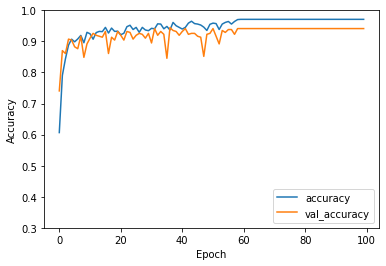

In [168]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [169]:
predictions = model.predict(X_test[:10])
print("pred shape", predictions.shape)

pred shape (10, 1)


In [170]:
predgenre = np.argmax(predictions,axis=1)
print(predgenre)
#print(genre)

[0 0 0 0 0 0 0 0 0 0]
